In [83]:
#import library yang ingin kita pake
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
# membaca data
data = pd.read_csv('/content/drive/MyDrive/mesin learning/Heart Failure Prediction/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [85]:
#mencari info data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [86]:
# normalize the data and bring all the variables to the same scale
from sklearn.preprocessing import normalize


In [87]:
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.000283,0.000000,0.002196,0.000000,0.000075,0.000004,0.999997,0.000007,0.000491,0.000004,0.000000,0.000015,0.000004
1,0.000209,0.000000,0.029836,0.000000,0.000144,0.000000,0.999555,0.000004,0.000516,0.000004,0.000000,0.000023,0.000004
2,0.000401,0.000000,0.000901,0.000000,0.000123,0.000000,0.999999,0.000008,0.000796,0.000006,0.000006,0.000043,0.000006
3,0.000238,0.000005,0.000529,0.000000,0.000095,0.000000,1.000000,0.000009,0.000652,0.000005,0.000000,0.000033,0.000005
4,0.000199,0.000003,0.000489,0.000003,0.000061,0.000000,1.000000,0.000008,0.000355,0.000000,0.000000,0.000024,0.000003


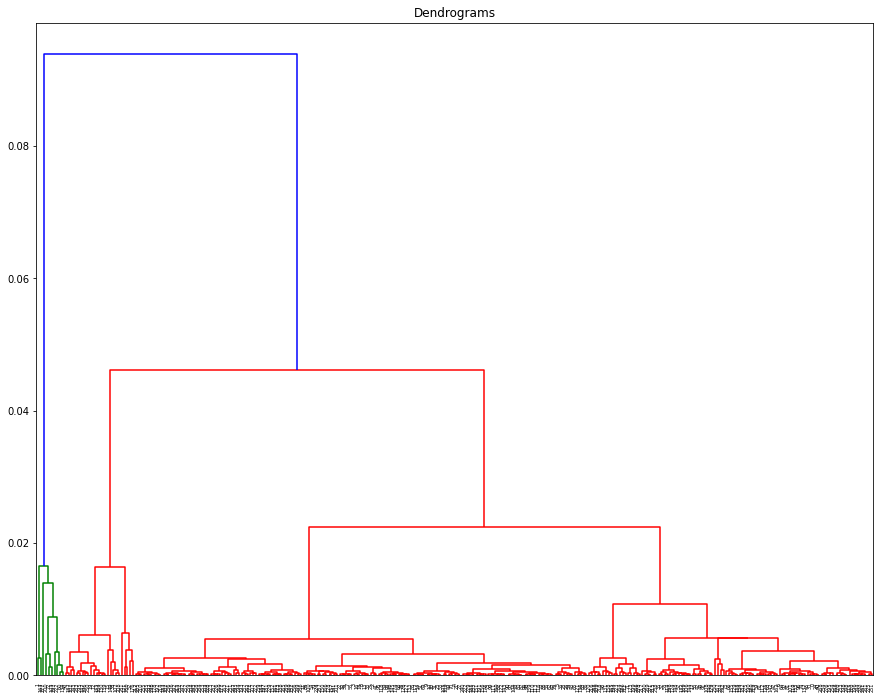

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 12))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

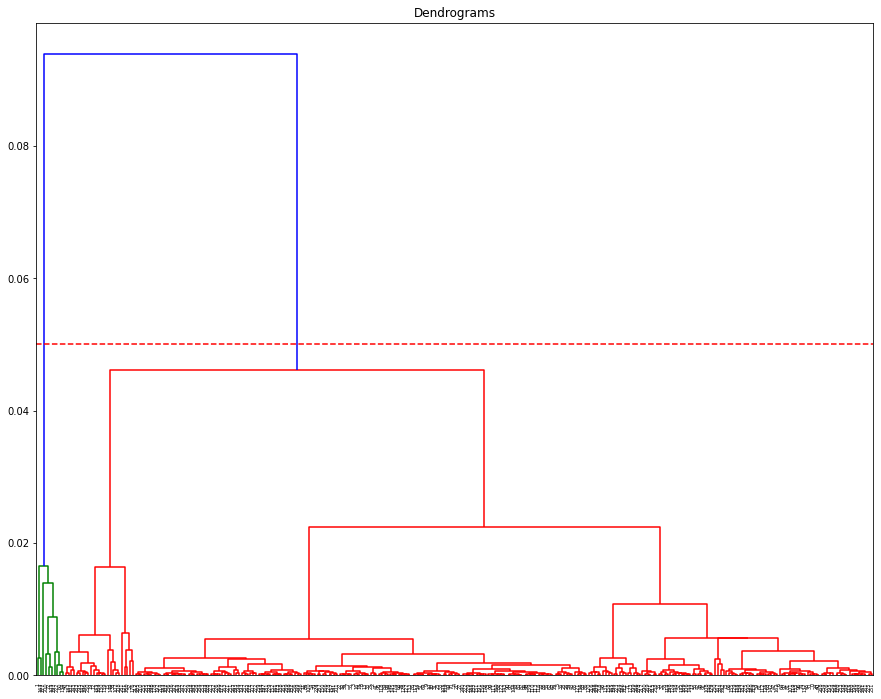

In [112]:
plt.figure(figsize=(15, 12))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=0.05, color='r', linestyle='--')

In [82]:
# apply hierarchical clustering for 2 clusters
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0.5, 1.0, 'Hierarki Clustering')

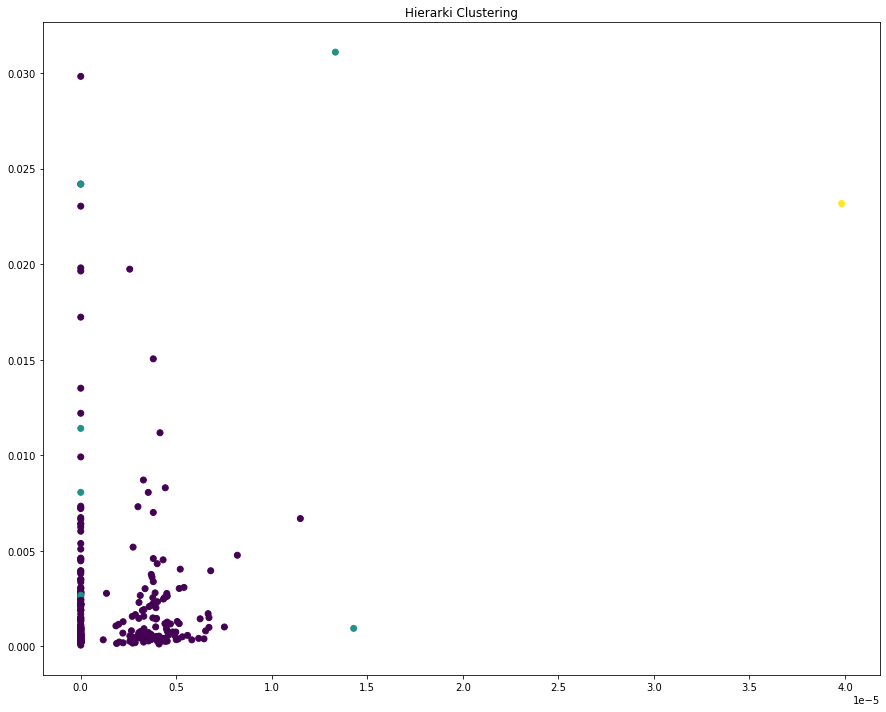

In [88]:
# visualize the three clusters
plt.figure(figsize=(15, 12))  
plt.scatter(data_scaled['diabetes'], data_scaled['creatinine_phosphokinase'], c=cluster.labels_) 
plt.title("Hierarki Clustering")

Text(0.5, 1.0, 'Hierarki Clustering')

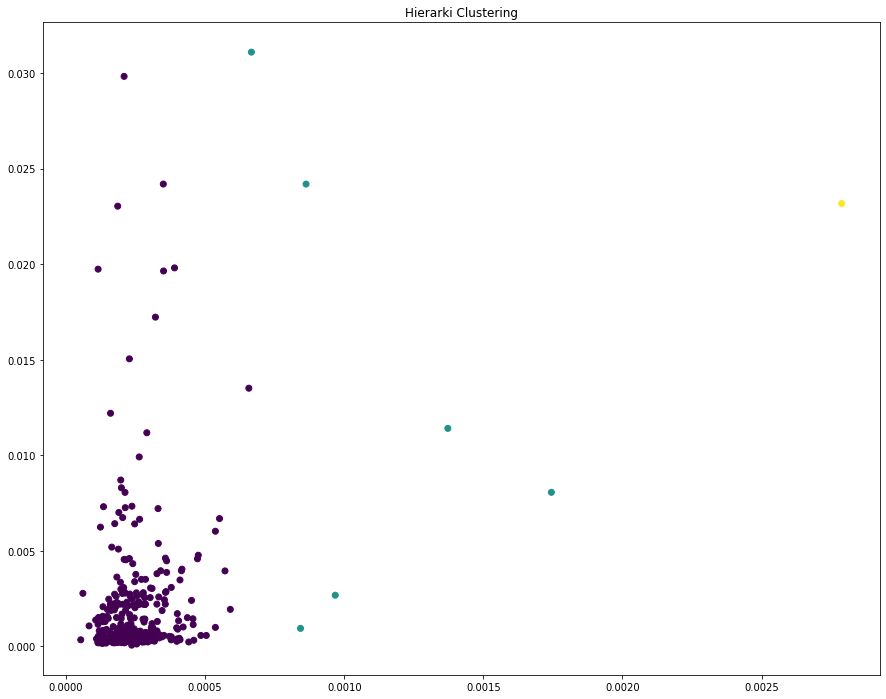

In [90]:
# visualize the three clusters
plt.figure(figsize=(15, 12))  
plt.scatter(data_scaled['age'], data_scaled['creatinine_phosphokinase'], c=cluster.labels_) 
plt.title("Hierarki Clustering")

In [ ]:
#Algoritma K-means

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# membaca data
data = pd.read_csv('/content/drive/MyDrive/mesin learning/Heart Failure Prediction/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# menghilangkan kolom yang tidak diperlukan
data = data.drop(["DEATH_EVENT","time","smoking","creatinine_phosphokinase"], axis=1)
data.head()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex
0,75.0,0,0,20,1,265000.00,1.9,130,1
1,55.0,0,0,38,0,263358.03,1.1,136,1
2,65.0,0,0,20,0,162000.00,1.3,129,1
3,50.0,1,0,20,0,210000.00,1.9,137,1
4,65.0,1,1,20,0,327000.00,2.7,116,0


In [ ]:
# menentukan variabel yang akan di klasterkan
data_x = data.iloc[:, 3:9]
data_x.head()

,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex
0,20,1,265000.00,1.9,130,1
1,38,0,263358.03,1.1,136,1
2,20,0,162000.00,1.3,129,1
3,20,0,210000.00,1.9,137,1
4,20,0,327000.00,2.7,116,0


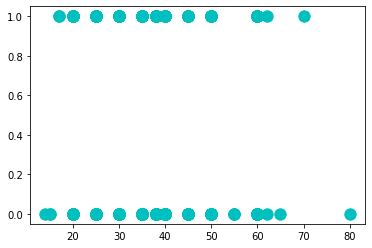

In [109]:
# memvisualkan pesebaran data
plt.scatter(data.ejection_fraction, data.high_blood_pressure,s=129, c='c', marker='o', alpha=1)
plt.show()

In [ ]:
# mengubah variabel data frame menjadi array
x_array = np.array(data_x)
print(x_array)

[[2.0000000e+01 1.0000000e+00 2.6500000e+05 1.9000000e+00 1.3000000e+02
  1.0000000e+00]
 [3.8000000e+01 0.0000000e+00 2.6335803e+05 1.1000000e+00 1.3600000e+02
  1.0000000e+00]
 [2.0000000e+01 0.0000000e+00 1.6200000e+05 1.3000000e+00 1.2900000e+02
  1.0000000e+00]
 ...
 [6.0000000e+01 0.0000000e+00 7.4200000e+05 8.0000000e-01 1.3800000e+02
  0.0000000e+00]
 [3.8000000e+01 0.0000000e+00 1.4000000e+05 1.4000000e+00 1.4000000e+02
  1.0000000e+00]
 [4.5000000e+01 0.0000000e+00 3.9500000e+05 1.6000000e+00 1.3600000e+02
  1.0000000e+00]]


In [ ]:
# menstandarkan ukuran variabel
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.09090909, 1.        , 0.29082313, 0.15730337, 0.48571429,
        1.        ],
       [0.36363636, 0.        , 0.28883262, 0.06741573, 0.65714286,
        1.        ],
       [0.09090909, 0.        , 0.16595951, 0.08988764, 0.45714286,
        1.        ],
       ...,
       [0.6969697 , 0.        , 0.86907504, 0.03370787, 0.71428571,
        0.        ],
       [0.36363636, 0.        , 0.13928961, 0.1011236 , 0.77142857,
        1.        ],
       [0.46969697, 0.        , 0.44841799, 0.12359551, 0.65714286,
        1.        ]])

In [ ]:
# menentukan dan mengkonfigurasi fungsi kmeans
kmeans = KMeans(n_clusters=3, random_state=123)
#menentukan kluster dari data
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [ ]:
# menampilkan pusat cluster
print(kmeans.cluster_centers_)

[[ 3.70851371e-01  1.00000000e+00  2.96871358e-01  9.96575709e-02
   6.81360544e-01  5.80952381e-01]
 [ 4.31693989e-01  0.00000000e+00  3.01617249e-01  1.02670842e-01
   6.75409836e-01 -5.55111512e-16]
 [ 3.29573935e-01  1.11022302e-15  2.76622624e-01  1.00025344e-01
   6.69817401e-01  1.00000000e+00]]


In [96]:
# menampilkan hasil cluster
print(kmeans.labels_)

# menambahkan kolom kluster dalam data frame data
data["kluster"] = kmeans.labels_
data

[0 2 2 2 1 0 2 2 1 0 0 0 2 0 0 2 2 2 0 1 0 0 0 2 0 2 0 0 2 2 0 2 0 1 0 2 2
 0 2 1 0 0 0 0 1 2 0 0 0 1 0 0 1 0 1 2 2 2 0 0 0 0 2 2 1 2 1 2 1 2 2 2 2 2
 2 2 0 2 0 0 1 2 1 0 0 2 0 0 0 0 2 2 1 2 0 0 0 1 0 1 2 0 2 2 0 0 2 2 2 2 2
 2 2 1 0 1 0 1 0 1 0 0 1 0 2 1 0 1 0 2 0 2 0 0 2 2 1 2 1 0 2 1 1 0 0 2 2 2
 2 0 0 0 0 2 0 2 1 2 2 0 0 2 2 1 2 0 2 2 1 0 2 2 0 2 0 2 2 1 2 2 2 2 2 0 2
 2 1 1 0 0 2 1 2 2 0 2 0 1 0 2 2 0 0 0 2 1 1 2 1 0 0 0 2 0 0 0 0 0 2 0 2 2
 2 2 2 1 2 0 1 1 1 2 2 2 2 0 0 2 1 2 0 2 2 0 2 2 2 2 2 1 0 1 0 0 0 0 1 0 2
 2 2 1 2 1 2 2 2 2 1 2 0 1 1 2 2 0 1 2 1 1 2 2 2 2 2 2 2 1 1 1 1 2 2 2 0 1
 1 2 2]


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,kluster
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,2
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,2
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,2
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,1
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,1
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,2


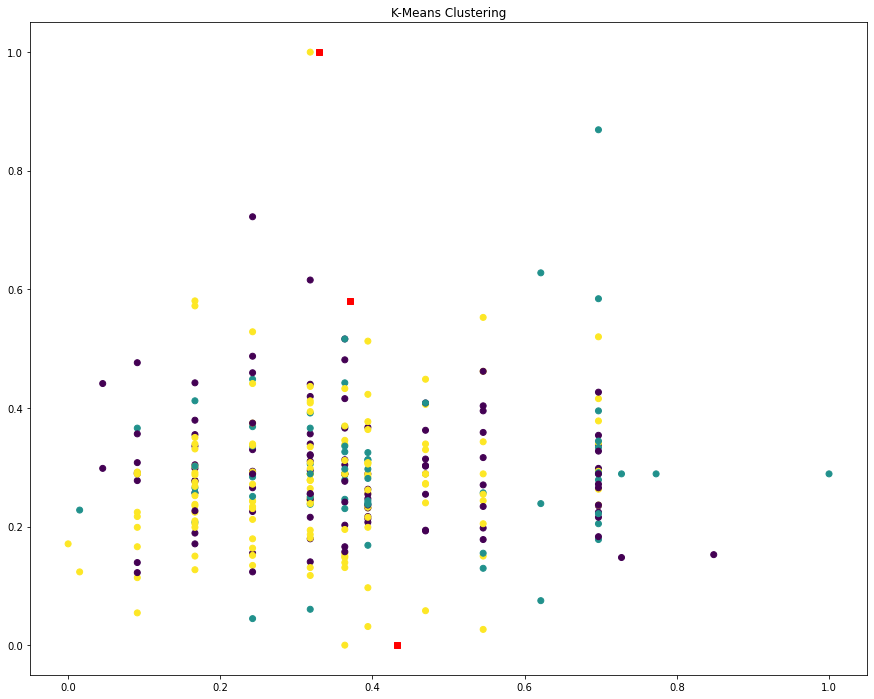

In [111]:
# memvisualkan hasil kluster
plt.figure(figsize=(15, 12)) 
output = plt.scatter(x_scaled[:,0], x_scaled[:,2],c=data.kluster, marker='o', alpha=1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,5], c='red', alpha=1, marker='s');

plt.title("K-Means Clustering")

plt.show()
